<a href="https://colab.research.google.com/github/Ankyytt/Hindi_Hate_Speech_Detection/blob/main/MLAlgos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Use '!' to run shell commands in a Jupyter cell
!pip install torch
!pip install transformers datasets
!pip install scikit-learn
!pip install accelerate -U

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
# Install the compatible Keras version for Transformers
!pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, hamming_loss
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# --- 1. Load the Dataset ---
try:
    df = pd.read_csv('hate_speech_hindi_cleaned (2).csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'hate_speech_hindi_cleaned (2).csv' not found.")
    print("Please make sure the CSV file is in the correct directory.")
    exit()

# --- 2. Data Preprocessing ---

# Drop rows where the 'clean_text' column is empty/NaN, as this is our feature
df.dropna(subset=['clean_text'], inplace=True)

# Define the feature (X) and the target labels (y)
X = df['clean_text']
label_columns = ['defamation', 'hate', 'non-hate', 'violence', 'vulgar']
y = df[label_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

# --- 3. Text Vectorization using TF-IDF ---
# Convert the text data into numerical vectors. TF-IDF is a great choice for this.
print("\nVectorizing text data using TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, smooth_idf=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Vectorization complete.")

# --- 4. Define and Train Models ---

# We will use OneVsRestClassifier because this is a multi-label problem.
# This strategy trains a separate classifier for each label.
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42)),
    'Multinomial Naive Bayes': OneVsRestClassifier(MultinomialNB()),
    'Linear SVC': OneVsRestClassifier(LinearSVC(random_state=42, dual=False)), # dual=False is recommended when n_samples > n_features
    'Random Forest': OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)) # n_jobs=-1 uses all available CPU cores
}

results = {}

# --- 5. Evaluate Models ---

print("\n--- Training and Evaluating Models ---")
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)

    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test_tfidf)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    hamming = hamming_loss(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-score (Weighted)': f1,
        'Hamming Loss': hamming
    }

    # Display classification report for detailed, per-label performance
    print(f"\n--- {model_name} Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=label_columns, zero_division=0))


# --- 6. Compare Results ---

# Create a DataFrame for a clean comparison
results_df = pd.DataFrame(results).T.sort_values(by='F1-score (Weighted)', ascending=False)

print("\n\n--- Final Model Comparison ---")
print("Hamming Loss: The fraction of labels that are incorrectly predicted (lower is better).")
print(results_df)

Dataset loaded successfully.
Data split into 14656 training samples and 3665 testing samples.

Vectorizing text data using TF-IDF...
Vectorization complete.

--- Training and Evaluating Models ---

Training Logistic Regression...
Evaluating Logistic Regression...

--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

  defamation       0.63      0.17      0.26       966
        hate       0.63      0.33      0.44      1160
    non-hate       0.71      0.58      0.64      1583
    violence       0.61      0.26      0.36       804
      vulgar       0.63      0.14      0.23       819

   micro avg       0.67      0.33      0.45      5332
   macro avg       0.64      0.29      0.39      5332
weighted avg       0.65      0.33      0.42      5332
 samples avg       0.39      0.35      0.36      5332


Training Multinomial Naive Bayes...
Evaluating Multinomial Naive Bayes...

--- Multinomial Naive Bayes Classification Report ---
            

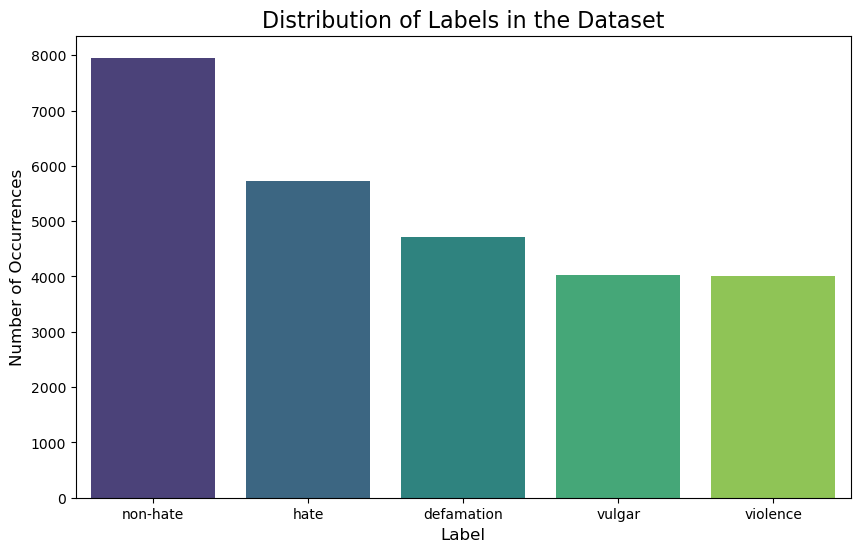

Label Counts:
 non-hate      7955
hate          5718
defamation    4719
vulgar        4026
violence      4000
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hate_speech_hindi_cleaned (2).csv')
label_columns = ['defamation', 'hate', 'non-hate', 'violence', 'vulgar']
df.dropna(subset=['clean_text'], inplace=True)

# Calculate the frequency of each label
label_counts = df[label_columns].sum().sort_values(ascending=False)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Labels in the Dataset', fontsize=16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

print("Label Counts:\n", label_counts)

In [ ]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
import lightgbm as lgb
import warnings

warnings.filterwarnings('ignore')

# --- 1. Load and Prepare Data ---
try:
    df = pd.read_csv('hate_speech_hindi_cleaned (2).csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'hate_speech_hindi_cleaned (2).csv' not found.")
    exit()

df.dropna(subset=['clean_text'], inplace=True)
X = df['clean_text']
label_columns = ['defamation', 'hate', 'non-hate', 'violence', 'vulgar']
y = df[label_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

# --- 2. Text Vectorization ---
print("\nVectorizing text data with TF-IDF (including bigrams)...")
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Vectorization complete.")

# --- 3. Train Individual Models and Store Predictions ---
print("\n--- Training and Evaluating Individual Models ---")

models = {
    'LinearSVC (Balanced)': OneVsRestClassifier(LinearSVC(random_state=42, C=1, dual=False, class_weight='balanced')),
    'LightGBM (Balanced)': OneVsRestClassifier(lgb.LGBMClassifier(random_state=42, class_weight='balanced')),
    'PassiveAggressive (Balanced)': OneVsRestClassifier(PassiveAggressiveClassifier(random_state=42, class_weight='balanced'))
}

results = {}
predictions = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)

    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test_tfidf)
    predictions[model_name] = y_pred # Store predictions for the ensemble

    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {'Weighted F1-Score': f1, 'Accuracy': accuracy}

    print(f"\n--- {model_name} Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=label_columns, zero_division=0))

# --- 4. Create and Evaluate the Manual Ensemble Model ---
print("\n--- Creating and Evaluating Manual Ensemble ---")

# Sum the predictions from the individual models
# This gives a "vote count" for each label for each sample
ensemble_votes = np.sum([
    predictions['LinearSVC (Balanced)'],
    predictions['LightGBM (Balanced)'],
    predictions['PassiveAggressive (Balanced)']
], axis=0)

# A majority vote means the sum of votes is 2 or more
# We create the final predictions based on this threshold
y_pred_ensemble = (ensemble_votes >= 2).astype(int)

# Evaluate the manual ensemble
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
results['Manual Ensemble (Voting)'] = {'Weighted F1-Score': f1_ensemble, 'Accuracy': accuracy_ensemble}

print("\n--- Manual Ensemble (Voting) Classifier Report ---")
print(classification_report(y_test, y_pred_ensemble, target_names=label_columns, zero_division=0))


# --- 5. Final Comparison ---
results_df = pd.DataFrame(results).T.sort_values(by='Weighted F1-Score', ascending=False)
print("\n\n--- Final Performance Summary ---")
print(results_df)

Dataset loaded successfully.
Data split into 14656 training samples and 3665 testing samples.

Vectorizing text data with TF-IDF (including bigrams)...
Vectorization complete.

--- Training and Evaluating Individual Models ---

Training LinearSVC (Balanced)...
Evaluating LinearSVC (Balanced)...

--- LinearSVC (Balanced) Classification Report ---
              precision    recall  f1-score   support

  defamation       0.41      0.52      0.46       966
        hate       0.49      0.58      0.53      1160
    non-hate       0.65      0.67      0.66      1583
    violence       0.44      0.63      0.52       804
      vulgar       0.44      0.63      0.52       819

   micro avg       0.50      0.61      0.55      5332
   macro avg       0.48      0.61      0.54      5332
weighted avg       0.51      0.61      0.55      5332
 samples avg       0.48      0.56      0.50      5332


Training LightGBM (Balanced)...
[LightGBM] [Info] Number of positive: 3753, number of negative: 10903
[Light

In [ ]:
# --- Code for Character N-Grams ---
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

print("\n--- Training a model with Character N-Grams ---")

# Create a pipeline that combines a character-level TF-IDF with a classifier
# Logistic Regression is fast and works well with this high-dimensional feature space
char_ngram_model = Pipeline([
    ('tfidf_char', TfidfVectorizer(analyzer='char', ngram_range=(3, 5), max_features=20000)),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')))
])

# Train the model
char_ngram_model.fit(X_train, y_train)

# Evaluate the model
y_pred_char = char_ngram_model.predict(X_test)
f1_char = f1_score(y_test, y_pred_char, average='weighted')

print("\n--- Character N-Gram Model Report ---")
print(classification_report(y_test, y_pred_char, target_names=label_columns, zero_division=0))
print(f"Character N-Gram Model Weighted F1-Score: {f1_char:.4f}")


--- Training a model with Character N-Grams ---

--- Character N-Gram Model Report ---
              precision    recall  f1-score   support

  defamation       0.48      0.59      0.53       966
        hate       0.53      0.64      0.58      1160
    non-hate       0.70      0.73      0.71      1583
    violence       0.50      0.69      0.58       804
      vulgar       0.50      0.74      0.60       819

   micro avg       0.55      0.68      0.61      5332
   macro avg       0.54      0.68      0.60      5332
weighted avg       0.56      0.68      0.61      5332
 samples avg       0.53      0.62      0.55      5332

Character N-Gram Model Weighted F1-Score: 0.6129


In [ ]:
# --- Code for Stacking Ensemble ---
from sklearn.ensemble import StackingClassifier

print("\n--- Training and Evaluating Stacking Ensemble Model ---")

# Define the base models (estimators)
# Note: The estimators should not be wrapped in OneVsRestClassifier here
estimators = [
    ('svc', LinearSVC(random_state=42, C=1, dual=False, class_weight='balanced')),
    ('lgbm', lgb.LGBMClassifier(random_state=42, class_weight='balanced')),
    ('pa', PassiveAggressiveClassifier(random_state=42, class_weight='balanced'))
]

# Create the Stacking Classifier
# It is wrapped in OneVsRestClassifier because the final output needs to be multi-label
stacking_model = OneVsRestClassifier(StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(), # The meta-model
    n_jobs=-1
))

# Train the stacking model
stacking_model.fit(X_train_tfidf, y_train)

# Evaluate the stacking model
y_pred_stacking = stacking_model.predict(X_test_tfidf)
f1_stacking = f1_score(y_test, y_pred_stacking, average='weighted')

print("\n--- Stacking Ensemble Classifier Report ---")
print(classification_report(y_test, y_pred_stacking, target_names=label_columns, zero_division=0))
print(f"Stacking Ensemble Weighted F1-Score: {f1_stacking:.4f}")


--- Training and Evaluating Stacking Ensemble Model ---

--- Stacking Ensemble Classifier Report ---
              precision    recall  f1-score   support

  defamation       0.65      0.16      0.26       966
        hate       0.64      0.36      0.46      1160
    non-hate       0.70      0.60      0.65      1583
    violence       0.64      0.33      0.44       804
      vulgar       0.60      0.21      0.31       819

   micro avg       0.67      0.37      0.48      5332
   macro avg       0.65      0.33      0.42      5332
weighted avg       0.65      0.37      0.45      5332
 samples avg       0.42      0.38      0.39      5332

Stacking Ensemble Weighted F1-Score: 0.4538
